This project is mainly used for the capstone project.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing
import itertools
from matplotlib.ticker import NullFormatter
%matplotlib inline

In [2]:
# load data set and some general information
df = pd.read_csv("Data-Collisions.csv")
df.head()

C:\Users\robin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.shape

(194673, 38)

In [4]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
# data description
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [7]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [3]:
# Selection features that we're interested in
df_new = df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND",
                   "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
df_categorical = df[["SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND",
                   "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
df_numerical = df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]]

In [4]:
# Selection features that we're interested in
df_new = df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND",
                   "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
df_categorical = df[["SEVERITYCODE", "ADDRTYPE", "COLLISIONTYPE", "JUNCTIONTYPE", "INATTENTIONIND", "UNDERINFL", "WEATHER", "ROADCOND",
                   "LIGHTCOND", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
df_numerical = df[["SEVERITYCODE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]]

In [4]:
missing_data = df_new.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: COLLISIONTYPE, dtype: int64

JUNCTIONTYPE
False    188344
True       6329
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
True     164868
False     29805
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    189789
True       4884
Name: UNDERINFL, dtype: int64

WEATHER
False    189592
True       5081
Name: WEATHER, dtype: int64

ROADCOND
False    189661
True       5012
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189503
True       5170
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
True     190006
False      4667
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
True     185340

In [10]:
# fix missing issue
df_new["INATTENTIONIND"].replace(np.nan, 0, inplace = True)
df_new["INATTENTIONIND"].replace('Y', 1, inplace = True)
df_new["UNDERINFL"].replace('Y', 1, inplace = True)
df_new["UNDERINFL"].replace('N', 0, inplace = True)
df_new["UNDERINFL"].replace(np.nan, 0, inplace = True)
df_new["PEDROWNOTGRNT"].replace(np.nan, 0, inplace = True)
df_new["PEDROWNOTGRNT"].replace('Y', 1, inplace = True)
df_new["SPEEDING"].replace(np.nan, 0, inplace = True)
df_new["SPEEDING"].replace('Y', 1, inplace = True)
df_new["WEATHER"].replace(np.nan, "Unknown", inplace = True)
df_new["LIGHTCOND"].replace(np.nan, "Unknown", inplace = True)
df_new["ROADCOND"].replace(np.nan, "Unknown", inplace = True)
df_new["COLLISIONTYPE"].replace(np.nan, "Other", inplace = True)
df_new["JUNCTIONTYPE"].replace(np.nan, "Unknown", inplace = True)
df_new["ADDRTYPE"].replace(np.nan, "Unknown", inplace = True)
df_new["HITPARKEDCAR"].replace('Y', 1, inplace = True)
df_new["HITPARKEDCAR"].replace('N', 0, inplace = True)
df_new.head()

C:\Users\robin\Anaconda3\lib\site-packages\pandas\core\generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,2,0,0,2,Intersection,Angles,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,0
1,1,2,0,0,2,Block,Sideswipe,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,1,4,0,0,3,Block,Parked Car,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,0
3,1,3,0,0,3,Block,Other,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0
4,2,2,0,0,2,Intersection,Angles,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,0


In [11]:
missing_data = df_new.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

PERSONCOUNT
False    194673
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    194673
Name: VEHCOUNT, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
False    194673
Name: COLLISIONTYPE, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

HITPARKEDCAR
False    194673
Name: HITPARKEDCAR, dtype: int64



In [12]:
Feature = df_new[["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INATTENTIONIND", "UNDERINFL", "PEDROWNOTGRNT", "SPEEDING", "HITPARKEDCAR"]]
Feature = pd.concat([Feature,pd.get_dummies(df_new['ADDRTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_new['COLLISIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_new['JUNCTIONTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_new['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_new['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df_new['LIGHTCOND'])], axis=1)
Feature.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Alley,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,0,2,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,4,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [13]:
X = Feature
X[0:5]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR,Alley,...,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2,0,0,2,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,4,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,3,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,2,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [14]:
y = df_new['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2], dtype=int64)

In [16]:
# normalize data
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.42518348,
        -0.2217116 , -0.1567239 , -0.22440165, -0.19619929, -0.06223095,
        -1.36876932,  1.41129279, -0.09996186,  2.14811072, -0.16915004,
        -0.10249953, -0.27517219, -0.41504558, -0.57196238, -0.18744809,
        -0.46074827, -0.12417149, -0.32510694, -0.10437651,  1.44892892,
        -0.2408193 , -0.36412936, -0.92535062, -0.02921369, -0.18344699,
        -0.01696304, -1.15340914, -0.05414257, -0.06551471,  2.45445634,
        -0.00506801, -0.45298634, -0.011333  , -0.02409974, -0.06841713,
        -0.33999734, -1.33213439, -0.07905204, -0.01813462, -0.02604842,
        -0.01963186, -0.07200071, -0.02431221, -0.33922589,  1.76085874,
        -0.08920831, -0.07872239, -0.576075  , -0.00751719, -0.1141037 ,
         0.82233559, -0.17682024, -0.03476509, -0.32543522],
       [-0.33020207, -0.18743029, -0.16958841,  0.12553783, -0.42518348,
        -0.2217116 , -0.1567239 , -0.22440165, -0.19619929, -0.

In [17]:
# method 1 : KNN
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size =0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 59) (155738,)
Test set: (38935, 59) (38935,)


In [18]:
Ks = 10
knn_jaccard_acc = np.zeros((Ks-1))
knn_f1_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks): 
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    knn_jaccard_acc[n-1] = metrics.jaccard_similarity_score(y_test, yhat)
    knn_f1_acc[n-1] = metrics.f1_score(y_test, yhat, average ='weighted')
print("Jaccard index Accuracy:", knn_jaccard_acc)
print("F1-Score Accuracy:", knn_f1_acc)

knn_final = KNeighborsClassifier(n_neighbors = 7).fit(X_train,y_train)
yhat = knn_final.predict(X_test)

Jaccard index Accuracy: [0.68640041 0.73478875 0.71958392 0.73553358 0.72623603 0.73776807
 0.73278541 0.73982278 0.73214332]
F1-Score Accuracy: [0.68390959 0.69401566 0.71219334 0.70966159 0.71406521 0.71215127
 0.71837506 0.71449372 0.7198936 ]


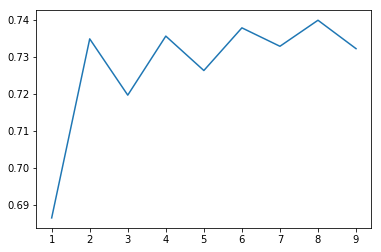

In [29]:
yt = [0.68640041, 0.73478875, 0.71958392, 0.73553358, 0.72623603, 0.73776807,
 0.73278541, 0.73982278, 0.73214332]
xt = [1,2,3,4,5,6,7,8,9]

plt.plot(xt, yt)


In [19]:
# method 2 : Decision Tree
from sklearn.tree import DecisionTreeClassifier
max_tree_depth = 10
d_tree_jaccard_acc = np.zeros((max_tree_depth-1))
d_tree_f1_acc = np.zeros((max_tree_depth-1))
ConfustionMx = [];
for n in range(1, max_tree_depth): 
    d_tree = DecisionTreeClassifier(criterion = "entropy", max_depth = n).fit(X_train,y_train)
    yhat = d_tree.predict(X_test)
    d_tree_jaccard_acc[n-1] = metrics.jaccard_similarity_score(y_test, yhat)
    d_tree_f1_acc[n-1] = metrics.f1_score(y_test, yhat, average ='weighted')
    
#dtree_final = DecisionTreeClassifier(criterion = "entropy", max_depth = 2).fit(X_train,y_train)
#yhat = dtree_final.predict(X_test)
print("Jaccard index Accuracy:", d_tree_jaccard_acc)
print("F1-Score Accuracy:", d_tree_f1_acc)

C:\Users\robin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Jaccard index Accuracy: [0.70437909 0.73224605 0.75325543 0.75325543 0.75325543 0.75921407
 0.76049827 0.76036985 0.76121741]
F1-Score Accuracy: [0.58220605 0.64758547 0.69097316 0.69097316 0.69097316 0.71923631
 0.71318262 0.71312207 0.71922057]


In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
d_tree_final = DecisionTreeClassifier(criterion = "entropy", max_depth = 2).fit(X_train,y_train)
dot_data = StringIO()
filename = "dtree.png"
featureNames = Feature.columns
targetNames = df["loan_status"].unique().tolist()
out=tree.export_graphviz(d_tree_final, feature_names = featureNames, out_file = dot_data, class_names = np.unique(y_train), filled = True, special_characters = True, rotate = False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(10, 20))
plt.imshow(img,interpolation = 'nearest')


In [20]:
# method 3 : SVM
from sklearn import svm
SVM = svm.SVC(kernel = 'rbf', gamma = "auto")
SVM.fit(X_train, y_train) 
yhat = SVM.predict(X_test)
print("The best Jaccard Index accuracy is", metrics.jaccard_similarity_score(y_test, yhat))
print("The best F1-score accuracy is", metrics.f1_score(y_test, yhat, average ='weighted'))


The best Jaccard Index accuracy is 0.7604725825093104
The best F1-score accuracy is 0.7184877678767575


In [21]:
# method 4 : Logistics Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C = 0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print("The best Jaccard Index accuracy is", metrics.jaccard_similarity_score(y_test, yhat))
print("The best F1-score accuracy is", metrics.f1_score(y_test, yhat, average ='weighted'))
print("The best Log Loss accuracy is", metrics.log_loss(y_test, yhat_prob))

The best Jaccard Index accuracy is 0.7595222807242841
The best F1-score accuracy is 0.7215176324847048
The best Log Loss accuracy is 0.4804844831660481
